In [1]:
import dask
import dask.array as da
import matplotlib.pyplot as plt
from image import image

In [2]:
i = image("test_images/medium.hdf5")

In [3]:
i.data

dask.array<array, shape=(10000, 10000), dtype=float32, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [4]:
min, max = i.data.min(), i.data.max()
print(min)
print(max)

dask.array<amin-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
dask.array<amax-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>


In [5]:
%time range = dask.compute(min,max)
print(range)

CPU times: user 234 ms, sys: 275 ms, total: 509 ms
Wall time: 426 ms
(-6.337392, 5.378777)


In [16]:
histo, bins = da.histogram(i.data, bins=100, range=range)

In [17]:
histo

dask.array<sum-aggregate, shape=(100,), dtype=int64, chunksize=(100,), chunktype=numpy.ndarray>

In [18]:
%time x = histo.compute()
print(x)

CPU times: user 6.45 s, sys: 131 ms, total: 6.58 s
Wall time: 1.74 s
[      1       0       0       0       1       1       5       2       1
      11      13      14      43      68      94     182     297     479
     764    1312    2051    3163    4928    7716   11522   17307   25353
   36829   52164   73889  103329  140751  191817  254653  336948  435417
  560481  709234  883104 1085606 1317941 1575214 1860073 2163954 2486024
 2814828 3150339 3469942 3769514 4041015 4274889 4460031 4593876 4660107
 4661905 4610820 4491100 4314632 4092069 3821576 3522219 3203242 2876846
 2545581 2223362 1913917 1624214 1363153 1124909  917600  737253  585487
  457449  352713  268407  201384  149210  108935   78652   55608   39591
   27143   18574   12335    8266    5302    3547    2143    1365     881
     535     325     184     113      65      42      20      10      13
       6]


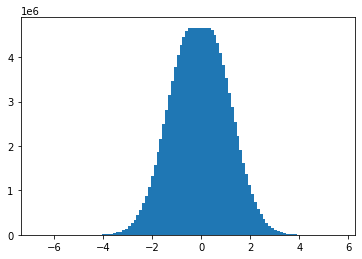

In [21]:
plt.bar(bins[:100],x)
plt.show()